In [3]:
import atlite
import logging
import pickle 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.constants import convert_temperature

from helper_functions import split_list, plot_feature_array

logging.basicConfig(level=logging.INFO)

In [ ]:
cutout = atlite.Cutout(
    path="de-2011-2012.nc",
    module="era5",
    x=slice(5.8, 15.1),
    y=slice(47.2, 55.1),
    time=slice("2011", "2012"),
)

INFO:atlite.cutout:Building new cutout de-2011-2015.nc


In [5]:
cutout.prepare()

INFO:atlite.data:Storing temporary files in C:\Users\csms\AppData\Local\Temp\tmpbywndmfh
INFO:atlite.data:Calculating and writing with module era5:


INFO:atlite.datasets.era5:Requesting data for feature influx...
INFO:atlite.datasets.era5:Requesting data for feature runoff...
INFO:atlite.datasets.era5:Requesting data for feature temperature...
INFO:atlite.datasets.era5:Requesting data for feature wind...
INFO:atlite.datasets.era5:CDS: Downloading variables
	2m_temperature (2011-1)
	soil_temperature_level_4 (2011-1)

INFO:atlite.datasets.era5:CDS: Downloading variables
	surface_net_solar_radiation (2011-1)
	surface_solar_radiation_downwards (2011-1)
	toa_incident_solar_radiation (2011-1)
	total_sky_direct_solar_radiation_at_surface (2011-1)

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\atlite\datasets\era5.py:99: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if "expver" in ds.dims.keys():
INFO:atlite.datasets.era5:CDS:

In [4]:
cutout = atlite.Cutout('cutout-de-2011-2015.nc')

In [17]:
cutout.data['runoff']

<xarray.DataArray 'runoff' (time: 43824, y: 32, x: 37)> Size: 415MB
dask.array<xarray-runoff, shape=(43824, 32, 37), dtype=float64, chunksize=(100, 32, 37), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 296B 6.0 6.25 6.5 6.75 7.0 ... 14.25 14.5 14.75 15.0
  * y        (y) float64 256B 47.25 47.5 47.75 48.0 ... 54.25 54.5 54.75 55.0
  * time     (time) datetime64[ns] 351kB 2011-01-01 ... 2015-12-31T23:00:00
    lon      (x) float64 296B dask.array<chunksize=(37,), meta=np.ndarray>
    lat      (y) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
Attributes:
    units:      m
    long_name:  Runoff
    module:     era5
    feature:    runoff

In [4]:
list(cutout.data.keys())

['height',
 'wnd100m',
 'wnd_azimuth',
 'roughness',
 'influx_toa',
 'influx_direct',
 'influx_diffuse',
 'albedo',
 'solar_altitude',
 'solar_azimuth',
 'temperature',
 'soil temperature',
 'runoff']

# 2011-2015

In [3]:
snapshot_split = split_list(cutout.data['time'].data, 30)

In [11]:
feature_keys = list(cutout.data.keys())[1:]
features = dict()
for key in feature_keys:
    features[key] = []

for snapshots in snapshot_split:
    time_slice = slice(snapshots[0], snapshots[-1])
    for key in feature_keys:
        mean = float(np.mean(cutout.data[key].sel(time=time_slice).data))
        features[key].append(mean)

In [13]:
with open('weather_features.pkl', 'wb') as f:
    pickle.dump(features, f)

In [14]:
dates = [snapshots[int(len(snapshots)/2)] for snapshots in snapshot_split]

[0.8743557813846792, 8.166271103125553, 15.023747100275955, 16.97364336704794, 12.376186385728829, 4.391305924817857, 0.006549693118245159, 7.431385926990913, 14.616097246822392, 17.858233647565612, 11.436416024265156, 3.4502381718734227, -0.06391426080818974, 4.158739264919518, 13.5842416244746, 18.717188475283137, 12.136709031806674, 4.259631572735202, 3.1404291797280166, 8.764392879005698, 14.224184053960471, 17.69473248076099, 13.494268824806568, 4.850999271011915, 1.7278195149835938, 6.7816376595461065, 14.218136220194879, 19.42465223101624, 10.916922163183926, 6.977460130736631]


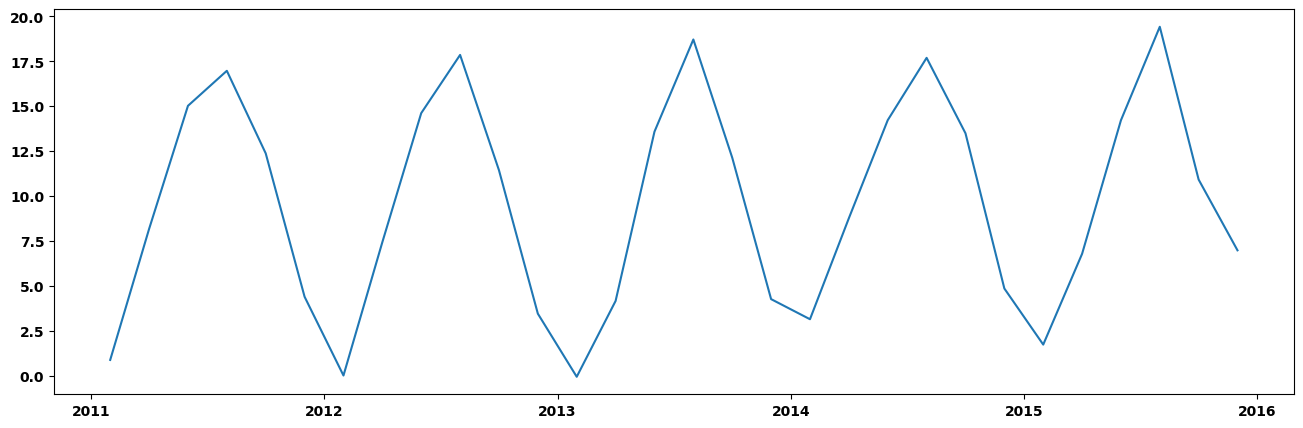

In [12]:
temperatures_C = [convert_temperature(tempr, 'K', 'C') for tempr in features['temperature']]
print(temperatures_C)
plt.figure(figsize=(16,5))
plt.plot(dates, temperatures_C)

# 2011

In [10]:
time_2011 = cutout.data['time'].sel(time=slice(np.datetime64('2011-01-01'), np.datetime64('2011-12-31'))).data
snapshot_split_2011 = split_list(time_2011, 52)

In [12]:
feature_keys = list(cutout.data.keys())[1:]
features_2011 = dict()
for key in feature_keys:
    features_2011[key] = []

for snapshots in snapshot_split_2011:
    time_slice = slice(snapshots[0], snapshots[-1])
    for key in feature_keys:
        mean = float(np.mean(cutout.data[key].sel(time=time_slice).data))
        features_2011[key].append(mean)

In [13]:
with open('weather_features_2011.pkl', 'wb') as f:
    pickle.dump(features_2011, f)

In [ ]:
dates = [snapshots[int(len(snapshots)/2)] for snapshots in snapshot_split_2011]

temperatures_C = [convert_temperature(tempr, 'K', 'C') for tempr in features_2011['temperature']]
print(temperatures_C)
plt.figure(figsize=(16,5))
plt.plot(dates, temperatures_C)

# Temperatures

In [17]:
snapshot_split = split_list(cutout.data['time'].data, 30)
location_split_x = 10
location_split_y = 51

feature_keys_x = [('west', slice(cutout.data['x'].data[0], location_split_x)), ('east', slice(location_split_x, cutout.data['x'].data[-1]))]
feature_keys_y = [('north', slice(location_split_y, cutout.data['y'].data[-1])), ('south', slice(cutout.data['y'].data[0], location_split_y))]

features = dict()
for key_y,_ in feature_keys_y:
    for key_x,_ in feature_keys_x:
        features[key_y+key_x] = []

for snapshots in snapshot_split:
    time_slice = slice(snapshots[0], snapshots[-1])
    for key_y, slice_y in feature_keys_y:
        for key_x, slice_x in feature_keys_x:
            data = cutout.data['wnd100m']
            data = data.sel(time=time_slice)
            data = data.sel(x=slice_x)
            data = data.sel(y=slice_y)
            mean = float(np.mean(cutout.data[key].sel(time=time_slice).data))
            features[key_y+key_x].append(float(np.mean(data).data))

In [18]:
with open('weather_features_wind.pkl', 'wb') as f:
    pickle.dump(features, f)